#### Intro:
This project is for DiDi's competition. The objective is to predict the gap at certain times of the day, guranteed that the order information for the past 30 minutes is available.

First we want to have benchmarks or methods to evaluate the forcasting model. There are four method that we will test our models against. These are:

1- The Average Method.<br />
    Function: avg(a) <br />
    Residual: 403319.11

2- The Naive Method.<br />
    Function: naive(a,t) <br />
    Residual: 153494

3- The Seasonal Naive Method.<br />
    Function: season_naive(a) <br />
    Residual: 163499

4- The Drift Method.<br />
    Function: drift(a)

In [1]:
# Import pylab to provide scientific Python libraries (NumPy, SciPy, Matplotlib)
%pylab --no-import-all
#import pylab as pl
# import the Image display module
from IPython.display import Image
import itertools
# inline allows us to embed matplotlib figures directly into the IPython notebook
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from datetime import datetime
from os import listdir
from os.path import isfile, join
from numpy.linalg import norm

def avg(a):
    return np.mean(a, axis=0)

def naive(a,t):
    return a[a.shape[0]-t,:]

def convert_date(t):
    d = datetime.strptime(t, '%Y-%m-%d %H:%M:%S')
    day = int(d.strftime('%d'))
    hour = int(d.strftime('%H'))
    minute = int(d.strftime('%M'))
    index = (day-1)*144 + ((minute%10)+1) + hour*6
    return index
  
frames = []
mypath = '/media/sahabi/Shared Storage/season_1/training_data/order_data'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
for i,files in enumerate(onlyfiles):
    data = '/media/sahabi/Shared Storage/season_1/training_data/order_data/'+files
    order_data = pd.read_csv(data,sep='\t',names=['order_id','driver_id','passenger_id','start_district_hash','dest_district_hash','Price','Time'])
    frames.append(order_data)
    if i ==140:
        break

result = pd.concat(frames)
order_data=result.fillna(0)
order_data['t_ind'] = order_data.Time.apply(convert_date)


Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


/home/sahabi/miniconda/envs/data/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [ ]:
districts = order_data['start_district_hash'].unique()
districts = ['4725c39a5e5f4c188d382da3910b3f3f']
for j in districts:
    demand = []
    supply = []
    gap = []
    for i in order_data['t_ind'].unique():
        try:
            demand.append(order_data['start_district_hash'][(order_data.t_ind == i) & (order_data.start_district_hash==j)].value_counts()[0])
        except:
            demand.append(0)
        try:
            supply.append(order_data['start_district_hash'][(order_data.t_ind == i) & (order_data.start_district_hash==j) & 
                                                        (order_data.driver_id!=0)].value_counts()[0])
        except:
            supply.append(0)
        try:
            gap.append(order_data['start_district_hash'][(order_data.t_ind == i) & (order_data.start_district_hash==j) & 
                                                      (order_data.driver_id==0)].value_counts()[0])
        except:
            gap.append(0)
            
    #plt.plot(demand)
    #plt.plot(supply)
    #plt.plot(gap)
    #plt.figure(1)
    #plt.plot(demand)
    #plt.figure(2)
    #plt.plot(supply)
    #plt.figure(3)
    #plt.plot(gap)

Average: 403207.111111
Naive: 153424
Seasonal Naive: 163499


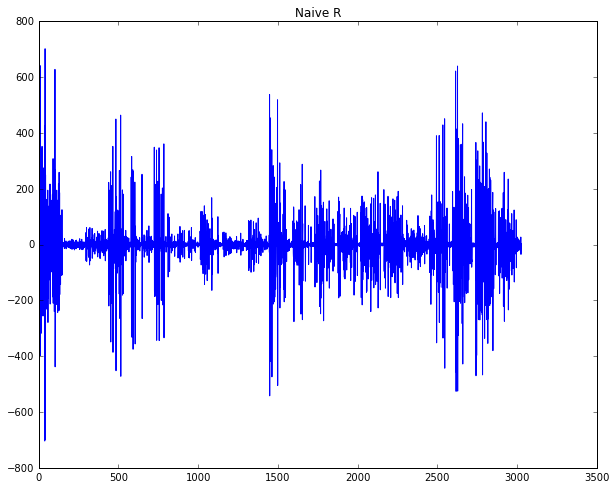

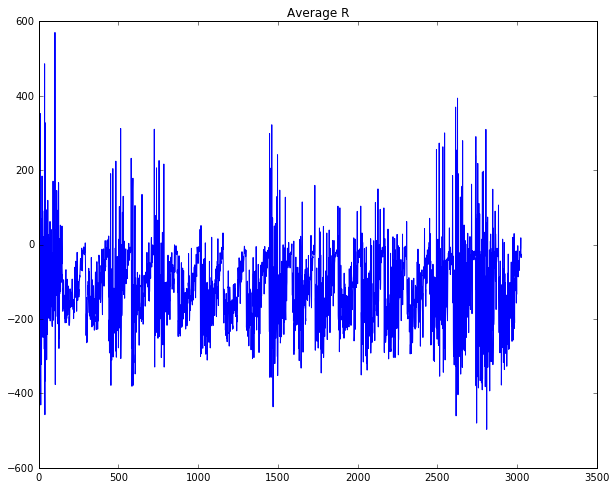

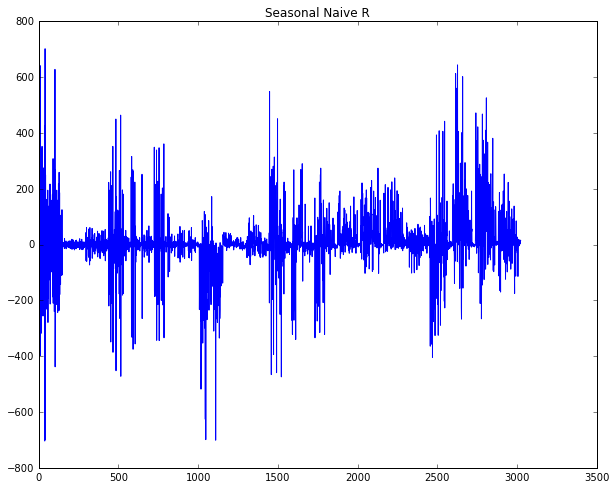

In [73]:
a = np.array([demand[:len(demand)-3],supply[:len(supply)-3],gap[:len(gap)-3],demand[1:len(demand)-2],
             supply[1:len(supply)-2],gap[1:len(gap)-2],demand[2:len(demand)-1],supply[2:len(supply)-1],
             gap[2:len(gap)-1]])

y_avg = avg(a)
y_naive = naive(a,1)
ts_avg = np.concatenate((gap[:3], y_avg))
ts_naive = np.concatenate((gap[:3],y_naive))
ts_season_naive = np.concatenate((gap[:3],y_naive[:1005],gap[:1008],gap[1008:2016]))
#figure(1,figsize=(8, 6))
#plot(gap)
#plot(ts_avg)
#figure(2,figsize=(10, 8))
#plot(gap)
#plot(ts_naive)
figure(3,figsize=(10, 8))
plot(gap - ts_naive)
plt.title('Naive ResidualR')
figure(4,figsize=(10, 8))
plot(gap-ts_avg)
plt.title('Average R')
figure(5,figsize=(10, 8))
plot(gap[0:3024]-ts_season_naive)
plt.title('Seasonal Naive R')

print 'Average: {}'.format(norm(ts_avg[0:3024] - gap[0:3024],1))
print 'Naive: {}'.format(norm(ts_naive[0:3024] - gap[0:3024],1))
print 'Seasonal Naive: {}'.format(norm(ts_season_naive - gap[0:3024],1))

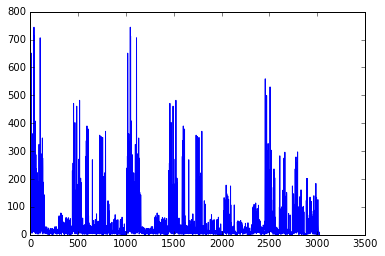

In [68]:
plot(ts_season_naive)

In [65]:
ts_avg.size

3028

In [66]:
len(gap)

3028

In [53]:
order_data[order_data.start_district_hash==j]

,order_id,driver_id,passenger_id,start_district_hash,dest_district_hash,Price,Time,t_ind
0,97ebd0c6680f7c0535dbfdead6e51b4b,dd65fa250fca2833a3a8c16d2cf0457c,ed180d7daf639d936f1aeae4f7fb482f,4725c39a5e5f4c188d382da3910b3f3f,3e12208dd0be281c92a6ab57d9a6fb32,24.0,2016-01-01 13:37:23,86
8,6fcae38baf2eb52e17273df41bf6fc6f,c586e492c4587c3aa15557a8eb41806d,c706cc35b05d84b224dec9d429c11de0,4725c39a5e5f4c188d382da3910b3f3f,4725c39a5e5f4c188d382da3910b3f3f,5.0,2016-01-01 14:28:07,93
13,1b3b4b633578f88325973e084450af6f,7c630c98ba6679b30014807acc856d28,2a6c22435b8a3379a65176f9613458e4,4725c39a5e5f4c188d382da3910b3f3f,4725c39a5e5f4c188d382da3910b3f3f,7.0,2016-01-01 19:39:54,124
19,bf9fcd57aa98208c11de945513e26cce,b29185649bd8d9c0fc04e44828b2a589,365e9ad6c8160b11ede6119b405dfbdd,4725c39a5e5f4c188d382da3910b3f3f,4725c39a5e5f4c188d382da3910b3f3f,9.0,2016-01-01 20:51:46,122
20,9a13aebfdf99847fd502815271e45a01,be681893fd4ced097c0f50848d6dc013,637bb09709d9b0482244da8614fc64dd,4725c39a5e5f4c188d382da3910b3f3f,91690261186ae5bee8f83808ea1e4a01,43.3,2016-01-01 19:51:58,116
24,f8d995b21014347594889d6b063a1b4e,014bdbc2de87e8f7d8f437fd396039ce,e5667a2864f0010132ada99a2cb1d32c,4725c39a5e5f4c188d382da3910b3f3f,d4ec2125aff74eded207d2d915ef682f,23.0,2016-01-01 11:38:52,75
25,fcb13796bb32ecebaf382cc2818dfcaa,2a5fe54cbbcfddddfbbde8ff2501a29e,e5667a2864f0010132ada99a2cb1d32c,4725c39a5e5f4c188d382da3910b3f3f,d4ec2125aff74eded207d2d915ef682f,21.4,2016-01-01 11:38:52,75
26,281cd7ee7eec420431b925a9c01710e6,cf0158eaacea11ee68bc8690bf100786,4a380881e07b7ff4ff3ff08185813963,4725c39a5e5f4c188d382da3910b3f3f,4725c39a5e5f4c188d382da3910b3f3f,12.0,2016-01-01 09:13:55,58
38,45c4aa074892ee26b507e690ec8b31bf,3936f65c2013f910ca80a8d4fa75615d,f4f367cce13af96c4e1e2786e43c8b35,4725c39a5e5f4c188d382da3910b3f3f,f9280c5dab6910ed44e518248048b9fe,61.0,2016-01-01 17:12:41,105
39,2361c3970802b7eeaf94015b3ac9be73,c42ee16c9f9ab6897f6d509ad27d0927,1d0dce8f5a85f935bb7a42e7fba90a8e,4725c39a5e5f4c188d382da3910b3f3f,4725c39a5e5f4c188d382da3910b3f3f,12.6,2016-01-01 17:32:23,105


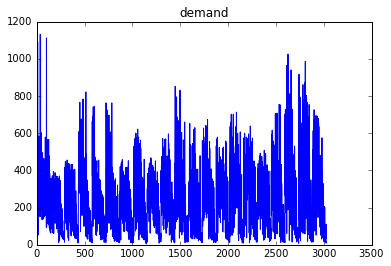

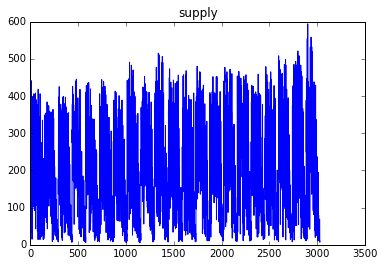

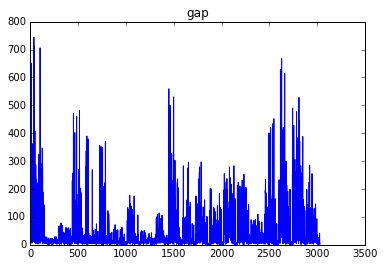

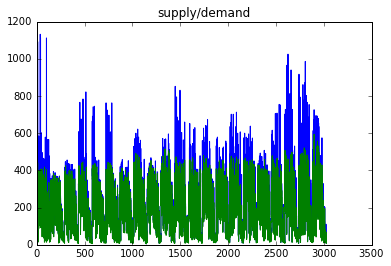

In [3]:
plt.figure(4)
plt.plot(demand)
plt.plot(supply)
plt.title('supply/demand')
plt.figure(3)
plt.plot(gap)
plt.title('gap')
plt.figure(2)
plt.plot(supply)
plt.title('supply')
plt.figure(1)
plt.plot(demand)
plt.title('demand')

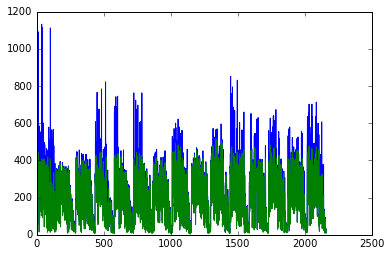

In [9]:
plt.plot(demand)
plt.plot(supply)

['order_data_2016-01-01',
 'order_data_2016-01-02',
 'order_data_2016-01-03',
 'order_data_2016-01-04',
 'order_data_2016-01-05',
 'order_data_2016-01-06',
 'order_data_2016-01-07',
 'order_data_2016-01-08',
 'order_data_2016-01-09',
 'order_data_2016-01-10',
 'order_data_2016-01-11',
 'order_data_2016-01-12',
 'order_data_2016-01-13',
 'order_data_2016-01-14',
 'order_data_2016-01-15',
 'order_data_2016-01-16',
 'order_data_2016-01-17',
 'order_data_2016-01-18',
 'order_data_2016-01-19',
 'order_data_2016-01-20',
 'order_data_2016-01-21']

Average: 403319.111111
Naive: 153494


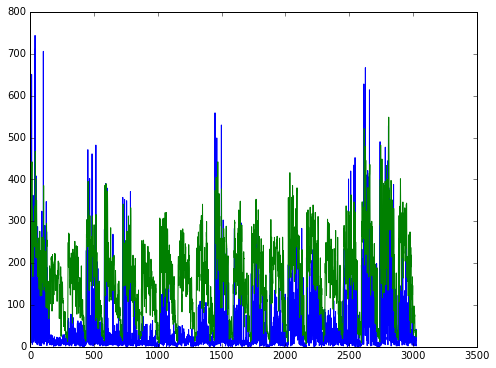

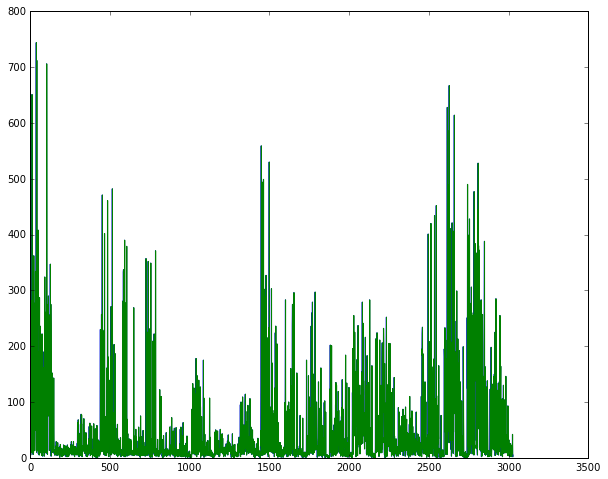

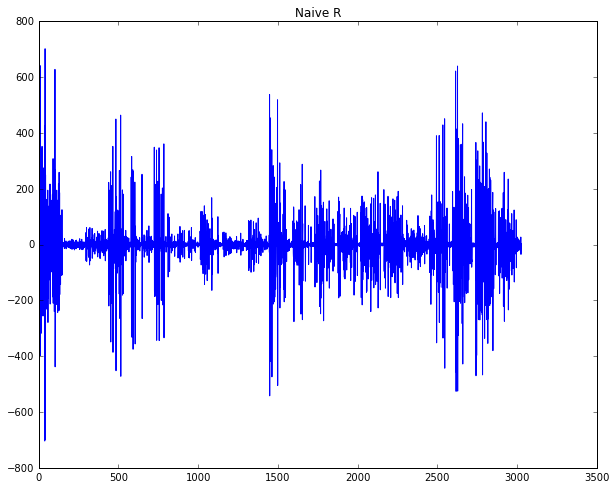

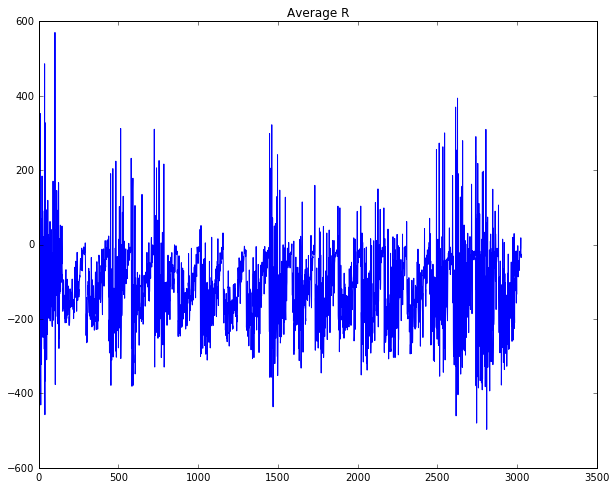

In [42]:
norm(ts_avg - gap,1)

403319.11111111112

In [47]:
norm(ts_naive - gap,1)

521433

In [24]:
prettyArray(a)

[[489,
  387,
  192,
  307,
  433,
  245,
  231,
  540,
  487,
  318,
  1092,
  491,
  406,
  375,
  545,
  411,
  520,
  363,
  54,
  338,
  408,
  585,
  316,
  325,
  197,
  519,
  464,
  351,
  279,
  446,
  505,
  453,
  554,
  444,
  486,
  151,
  524,
  1132,
  446,
  152,
  1114,
  338,
  356,
  355,
  247,
  441,
  499,
  476,
  602,
  346,
  182,
  434,
  364,
  295,
  450,
  171,
  135,
  496,
  193,
  251,
  485,
  434,
  236,
  266,
  346,
  239,
  228,
  243,
  149,
  427,
  139,
  393,
  384,
  465,
  210,
  151,
  225,
  171,
  387,
  242,
  375,
  150,
  456,
  404,
  175,
  372,
  220,
  161,
  170,
  360,
  579,
  240,
  158,
  295,
  307,
  223,
  163,
  509,
  222,
  206,
  313,
  92,
  1112,
  525,
  96,
  353,
  448,
  188,
  403,
  483,
  262,
  273,
  116,
  565,
  162,
  232,
  204,
  301,
  511,
  163,
  354,
  123,
  144,
  158,
  515,
  566,
  247,
  351,
  479,
  318,
  107,
  215,
  92,
  222,
  146,
  81,
  384,
  178,
  143,
  186,
  153,
  216,
  67,
 

In [13]:
b.mean(axis=0)

array([ 4.,  5.,  6.])

In [14]:
b

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [15]:
a.shape

(9,)